# 모델 성능 평가지표 (Metric)
- 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정 하는 것
- 모델 평가 목적
    - Over Fitting 을 방지하고 최적의 모델을 찾기 위해    

- 분류 문제 성능측정
    - 실제값과 예측값이 일치하는 갯수를 통해 측정

# 분류문제 성능 측정

![](https://codetorial.net/tensorflow/_images/MNIST_sample.png)

## 손글씨 분류 문제
- 0~9 손글씨 이미지 받아오기

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

- 8 x 8 크기의 이미지가 Flatten 되어있다.


In [3]:
16*(8*8)*10

10240

In [6]:
digits.data.shape # 예) z = w0 + w1x1 + w2x2 + ... + w64x64

(1797, 64)

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
digits.target.shape

(1797,)

In [11]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
import matplotlib.pyplot as plt

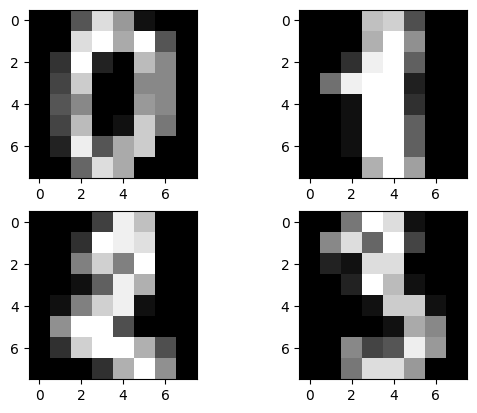

In [ ]:
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(digits.data[0].reshape(8,8),cmap="gray")
ax[0,1].imshow(digits.data[1].reshape(8,8),cmap="gray")
ax[1,0].imshow(digits.data[2].reshape(8,8),cmap="gray")
ax[1,1].imshow(digits.data[3].reshape(8,8),cmap="gray")
plt.show()

### 5을 맞추는 문제로 재정의

In [12]:
data = digits.data
target = (digits.target == 5).astype(int) #digits.target=0~9, digits.target==5 -> 0 0 0 0 1 0 0 0 0 0

In [13]:
target.mean()# 0~ 9 까지의 데이터가 존재하므로 숫자 5만 1로 변경하고 숫자 5의 분포를 확인 

0.10127991096271564

### 학습셋과 검증셋 분리

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, target)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((1347, 64), (450, 64), (1347,), (450,))

In [16]:
y_train.mean(), y_test.mean() # 둘다 10% 정도 숫자5를 갖고 있다. 

(0.10022271714922049, 0.10444444444444445)

# 혼동행렬(Confusin Matrix)
- 이진 분류의 model 성능측정 지표
    - 이진 분류에서 예측 오류가 어느정도 되는지와 어떠한 유형의 예측 오류가 발생하는지를 나타내는 지표

- Precision (정밀도)
    - 양성으로 예측한 값들 중에 맞춘 비율

- Recall(재현율)
    - Sensitivity(민감도)
    - TPR
    - 실제 양성값들 중에 맞춘 비율

- FPR
    - 실제 음성값들 중에 못 맞춘 비율

## Evaluating model performance : F-score, Accuracy

1. True Positive(TP) : 결함이 있다고 예측한 것들 중 실제로 결함이 있는 것
2. False Positive(FP) : 결함이 있다고 예측한 것들 중 실제로 결함이 없는 것
3. True Negative(TN) : 결함이 없다고 예측한 것들 중 실제로 결함이 없는 것
4. False Negative(FN) : 결함이 없다고 예측한 것들 중 실제로 결함이 있는 것

|                     | 실제 True          | 실제 False          |
|---                  |---                 |---                  |
| 분류결과 True       | $$N_{TP}$$         |    $$N_{FP}$$       |
| 분류결과 False      |   $$N_{FN}$$       |   $$N_{TN}$$        | 

- $N$ : 개수를 나타낸다. 

### accuracy, precision, recall 
$$\text{accuracy} = \frac{\text{정확하게 예측한 개수}}{\text{예측한 전체 개수}} \frac{N_{TP} + N_{TN}}{N_{TP}+N_{FN}+N_{FP}+N_{TN}}$$
$$\text{precision} = \frac{\text{True 라고 정확하게 예측한 개수}}{\text{True 라고 예측한 총 개수}} = \frac{N_{TP}}{N_{TP}+N_{FP}}$$
$$\text{recall} = \frac{\text{True 라고 정확하게 예측한 개수}}{\text{실제로 True의 개수}} =\frac{N_{TP}}{N_{TP}+N_{FN}}$$

### F-score
- precision과 recall을 이용해 계산 가능

$$\text{F-score} = \frac{(1+\beta^2) \text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$$

- $\beta$는 precision과 recall중 어떤 것에 가중을 부여하여 판단할지 사용자가 정하는 상수 

## 임계값(thresholds)
- 모델은 분류에서 확률(0~1) 또는 음수에서 양수사이에 실수를 예측값으로 출력
- 사이킷런에서는 `predict_proba`, `decision_function`메소드를 제공
- predict_proba : 0.5 이상이면 1로 예측
- decision_function : 0 이상이면 1로 예측

## Accuracy 의 한계
- 오류(틀린갯수)중에서 FN 오류(아니라고 예측했는데 맞았을 경우)를 줄이는 것이 더 중요한 경우
- 오류 중에 FP 오류(맞다고 했는데 틀렸을 경우)를 줄이는 것이 더 중요한 경우
- 정확도는 위에 두가지 오류에 정도의 차이를 구분할수 없기 때문에 적절한 성능지표가 될수 없다.
- 음성(0)이 양성(1)보다 훨씬 많은 경우 음성(0)으로만 예측해도 높은 정확도를 보이기 때문에 적절한 성능지표가 될수없다.


In [17]:
import numpy as np
SEED =1234

- Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3,random_state=SEED)
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)

- 정확도 평가

In [19]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,pred_tree)
print(f"tree:{score}")

tree:0.9666666666666667


- Confusion Matrix 그리기

In [ ]:
pred_tree


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

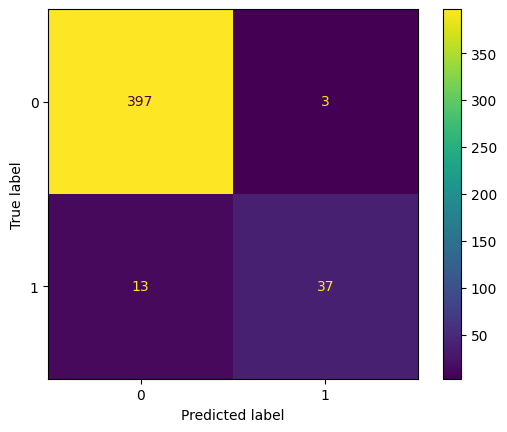

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Precision vs Recall
- FP 줄이는것이 목표일때 Precision 사용
- FN 줄이는것이 목표일때 Recall 사용

In [26]:
from sklearn.metrics import precision_score , recall_score

precision_score(y_test,pred_tree)

0.8636363636363636

In [ ]:
recall_score(y_test,pred_tree)

0.74

### Precision-Recall Trade-off (절충관계)

![trade_off.png](https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/07/un-87.png)

In [22]:
tree.classes_

array([0, 1])

In [20]:
tree.predict_proba(x_test) #[:,0]= 첫번쨰 클래스(0)에 속할 확률, [:,1]=두번째 클래스(1)에 속할 확률

array([[0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.96309963, 0.03690037],
       [0.96309963, 0.03690037],
       [0.99146211, 0.00853789],
       [0.94444444, 0.05555556],
       [0.01769912, 0.98230088],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.66666667, 0.33333333],
       [0.96309963, 0.03690037],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.01769912, 0.98230088],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.96309963, 0.03690037],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.99146211, 0.00853789],
       [0.

In [24]:
pred_proba = tree.predict_proba(x_test)[:,1] #[:,0]= 첫번쨰 클래스에 속할 확률, [:,1]=두번째 클래스에 속할 확률

In [27]:
threshold = 0.9
pred = np.where(pred_proba > threshold , 1 , 0) #예측확률이 임계점보다 크면 1, 아니면 0

precision_score(y_test,pred), recall_score(y_test,pred)

(0.8636363636363636, 0.8085106382978723)

In [28]:
threshold = 0.1
pred = np.where(pred_proba > threshold ,1,0)

precision_score(y_test,pred), recall_score(y_test,pred)

(0.8085106382978723, 0.8085106382978723)

## F1-score
$$
F1 = 2*\frac{Precision*Recall}{Precision+Recall}
$$
- Precision 과 Recall의 조화평균
- 정밀도와 재현율 사이에 하나가 높아지면 다른 하나가 낮아지는 상황이 자주 발생하기에 이를 보정하기 위해 개발
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않았을때 높은 점수가 나온다.
- Precison 과 Recalld은 Trade-off 관계이기때문에, 이둘의 조화평균값이 F1-score를 많이 사용한다.

- precision = 0.1, recall = 0.9 가정!!

In [ ]:
(0.1+0.9)/2 # 산술평균

0.5

In [ ]:
2 * 0.1*0.9 /(0.1+0.9) # 조화평균= 역수의 산술평균의 역수

0.18000000000000002

In [ ]:
2 * 0.5*0.5 /(0.5+0.5) # 두개가 같은경우

0.5

In [ ]:
2 * 5*5 /(5+5)

5.0

In [ ]:
pred_tree.shape

(450,)

In [29]:
pred_proba

array([0.00853789, 0.00853789, 0.00853789, 0.03690037, 0.03690037,
       0.00853789, 0.05555556, 0.98230088, 0.00853789, 0.00853789,
       0.00853789, 0.00853789, 0.00853789, 0.33333333, 0.03690037,
       0.00853789, 0.00853789, 0.98230088, 0.00853789, 0.00853789,
       0.00853789, 0.00853789, 0.00853789, 0.00853789, 0.03690037,
       0.00853789, 0.00853789, 0.00853789, 0.00853789, 0.00853789,
       0.03690037, 0.00853789, 0.00853789, 0.00853789, 0.00853789,
       0.00853789, 0.00853789, 0.98230088, 0.00853789, 0.00853789,
       0.00853789, 0.98230088, 0.00853789, 0.00853789, 0.00853789,
       0.00853789, 0.03690037, 0.03690037, 0.00853789, 0.00853789,
       0.00853789, 0.03690037, 0.00853789, 0.03690037, 0.98230088,
       0.00853789, 0.00853789, 0.00853789, 0.00853789, 0.00853789,
       0.03690037, 0.03690037, 0.03690037, 0.00853789, 0.03690037,
       0.00853789, 0.00853789, 0.00853789, 0.00853789, 0.00853789,
       0.00853789, 0.00853789, 0.00853789, 0.00853789, 0.00853

In [ ]:
threshold = 0.9 # 확률이 90% 이상인 예측값만 숫자 5라고 결정하자
pred = np.where(pred_proba > threshold , 1 , 0)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.8131868131868132

- recall, precision,F1-score 한번에 보기

In [ ]:
from sklearn.metrics import classification_report
print("tree model")
print(classification_report(y_test,pred))

tree model
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       400
           1       0.90      0.74      0.81        50

    accuracy                           0.96       450
   macro avg       0.94      0.86      0.90       450
weighted avg       0.96      0.96      0.96       450



## ROC (Receiver Operating Characteristic curve)
- FPR을 X축으로, TPR을 Y축으로 해서 둘간의 관계를 표현한 그래프
    - FPR = FP / (FP+TN)
    - TPR = TP / (FN+TP)
- FPR이 천천히 증가하면서  TPR이 빨리 증가하는 모델을 만들어야한다.
- 면적이 클수록 좋은 모델임

![ROC.png](https://miro.medium.com/max/640/1*pk05QGzoWhCgRiiFbz-oKQ.webp)

- ROC Curve

In [ ]:
pred_tree = tree.predict_proba(x_test)[:,1]

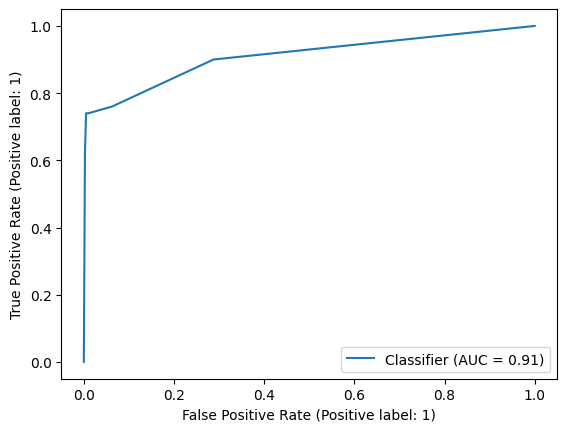

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test,pred_tree, ax=ax)
plt.show()

## AUROC (ROC AUC) 
- Roc Curved의 밑부분 면적 
- 넓을수록 모형 성능이 좋다 (1에 가까울수록 좋다)
- 임계값이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정 할수 있다
- Poor model(0.5 ~ 0.7)
- Fare model(0.7 ~ 0.8)
- Good model(0.8 ~ 0.9)
- Excellent model (0.9~1.0)

# 다중분류 Metric

## F1-score (다중분류)
- micro
    - 전체 클래스의 대하여 TP/FP/FN 구한뒤에 F1-score 계산
- macro
    - 각 클래스 대하여 F1-score 구한뒤 산술 평균
- weighted
    - 각 클래스의 대하여 F1-score 구한뒤 각 클래스가 차지하는 비율에 따라 가중평균
    


In [ ]:
digits = load_digits()

data = digits.data
target = digits.target

x_train,x_test,y_train,y_test= train_test_split(data,target,random_state=SEED)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [ ]:
np.unique(y_train) , np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
tree = DecisionTreeClassifier(max_depth= 5 ,random_state=SEED)
tree.fit(x_train,y_train)
pred = tree.predict(x_test)
pred

array([7, 3, 7, 6, 8, 8, 4, 3, 6, 3, 7, 8, 2, 3, 4, 3, 3, 7, 8, 4, 0, 3,
       3, 1, 3, 6, 6, 0, 4, 4, 8, 8, 8, 3, 8, 2, 7, 6, 5, 8, 6, 4, 4, 0,
       3, 8, 3, 8, 4, 1, 4, 8, 8, 6, 3, 8, 9, 3, 9, 0, 8, 3, 8, 8, 8, 1,
       3, 3, 8, 2, 3, 6, 9, 5, 6, 8, 3, 2, 1, 3, 8, 1, 3, 3, 8, 7, 7, 8,
       8, 8, 6, 8, 3, 3, 6, 4, 5, 8, 2, 4, 9, 1, 7, 6, 5, 7, 8, 4, 8, 0,
       7, 6, 1, 2, 9, 5, 1, 5, 0, 3, 2, 7, 6, 4, 8, 8, 8, 8, 6, 9, 6, 2,
       5, 4, 7, 5, 0, 8, 8, 0, 5, 6, 8, 6, 3, 8, 3, 8, 0, 4, 4, 3, 5, 4,
       6, 8, 1, 1, 6, 1, 7, 9, 0, 8, 9, 5, 4, 1, 3, 8, 6, 4, 7, 8, 5, 8,
       4, 8, 4, 2, 8, 8, 8, 8, 4, 2, 3, 5, 6, 3, 4, 5, 5, 3, 3, 3, 1, 1,
       8, 0, 8, 2, 9, 6, 8, 4, 6, 8, 3, 3, 1, 0, 8, 8, 8, 5, 6, 8, 7, 1,
       8, 3, 4, 3, 7, 0, 5, 5, 6, 8, 3, 0, 5, 8, 8, 0, 9, 3, 6, 7, 8, 4,
       1, 0, 5, 8, 5, 8, 6, 4, 8, 8, 8, 6, 4, 4, 6, 3, 8, 8, 8, 6, 5, 8,
       3, 7, 7, 0, 8, 0, 4, 3, 1, 2, 7, 3, 8, 5, 9, 5, 8, 0, 4, 8, 4, 3,
       4, 0, 7, 7, 8, 5, 3, 5, 3, 8, 7, 5, 5, 8, 7,

In [ ]:
print("##F1-score-multiple##")
print(classification_report(y_test,pred))


##F1-score-multiple##
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.61      0.36      0.45        47
           2       0.70      0.29      0.41        49
           3       0.52      0.86      0.65        44
           4       0.95      0.75      0.84        52
           5       0.95      0.82      0.88        49
           6       0.90      0.96      0.92        45
           7       0.88      0.70      0.78        40
           8       0.34      0.86      0.48        43
           9       0.74      0.32      0.44        44

    accuracy                           0.68       450
   macro avg       0.75      0.69      0.68       450
weighted avg       0.76      0.68      0.68       450



In [ ]:
f1_score(y_test,pred,average="micro")

0.68

In [ ]:
f1_score(y_test,pred,average="macro")

0.6830120149605341

In [ ]:
f1_score(y_test,pred,average="weighted")

0.6789748956333231

- 소프트맥스 함수(Softmax Function)
$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$
    - 각클래스에 대한 확률을 출력
    - 입력받은 값들을 0~1사이의 값들로 모두 정규화하면 출력값들의 합은 항상 1이 되는 특성을 가진 함수

In [ ]:
tree.predict_proba(x_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

- 음의 로그함수
    - 1을 넣으면 0이 나온다. 0에 가까운 값을 넣을수록 큰값이 나온다.

## Multi classification 에서의 Cross_entropy(logloss)
- 모델이 예측한 확률 값을 반영해서 평가
- 0에 가까울수록 좋은 모델
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온값들의 평균으로 평가 한다. 


<img src = "https://velog.velcdn.com/images%2Fskyepodium%2Fpost%2F70022c68-6383-4fb4-b588-60d220917606%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-23%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%206.51.00.png" width = "1000"></br>
<img src = "https://velog.velcdn.com/images%2Fskyepodium%2Fpost%2F7c785085-fb24-4c7e-93a4-6b8ec79c4c4a%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-23%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%206.18.41.png" width = "1000">

- https://velog.io/@skyepodium/logloss-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0

In [ ]:
from sklearn.metrics import log_loss
pred = tree.predict_proba(x_test)
pred

array([[0.        , 0.        , 0.        , ..., 0.96666667, 0.        ,
        0.        ],
       [0.        , 0.0745614 , 0.01754386, ..., 0.00877193, 0.07017544,
        0.3377193 ],
       [0.        , 0.        , 0.        , ..., 0.96666667, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00301205, 0.20481928, 0.26204819, ..., 0.09337349, 0.3253012 ,
        0.03012048],
       [0.00301205, 0.20481928, 0.26204819, ..., 0.09337349, 0.3253012 ,
        0.03012048]])

In [ ]:
log_loss(y_test,pred)

2.230548531731848